In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('synthetic_sensor_data.csv')
data.head()

,Timestamp,Temperature,Anomaly,Location
0,2024-06-01 19:50:28,24.476332,0,SensorB
1,2024-06-01 19:50:28,18.253966,0,SensorA
2,2024-06-01 19:50:28,14.953520,0,SensorB
3,2024-06-01 19:50:28,17.667181,0,SensorA
4,2024-06-01 19:50:28,17.079826,0,SensorA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  object 
 1   Temperature  10000 non-null  float64
 2   Anomaly      10000 non-null  int64  
 3   Location     6704 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [4]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    10000 non-null  datetime64[ns]
 1   Temperature  10000 non-null  float64       
 2   Anomaly      10000 non-null  int64         
 3   Location     6704 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
data.describe()

,Timestamp,Temperature,Anomaly
count,10000,10000.000000,10000.000000
mean,2024-06-01 19:50:28.980199936,26.357776,0.022900
min,2024-06-01 19:50:28,0.482169,0.000000
25%,2024-06-01 19:50:29,21.736465,0.000000
50%,2024-06-01 19:50:29,25.152475,0.000000
75%,2024-06-01 19:50:29,28.648289,0.000000
max,2024-06-01 19:50:29,109.845929,1.000000
std,NaN,10.940186,0.149592


In [7]:
# Checking for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Timestamp         0
Temperature       0
Anomaly           0
Location       3296
dtype: int64


In [8]:
# Insight: Missing values are present in the 'Location' column, which may need imputation or exclusion .

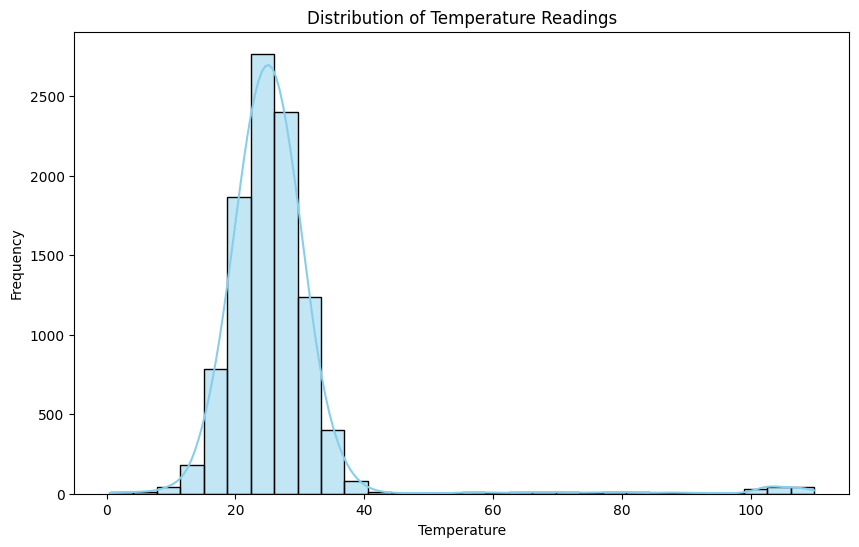

In [9]:
# Plot: Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Temperature Readings")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Detecting Outliers in Temperature using IQR
Q1 = data['Temperature'].quantile(0.25)
Q3 = data['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Temperature'] < lower_bound) | (data['Temperature'] > upper_bound)]
print(f"\nNumber of outliers detected: {outliers.shape[0]}")


Number of outliers detected: 308


In [11]:
outliers['Anomaly'].value_counts()

Anomaly
1    229
0     79
Name: count, dtype: int64

In [12]:
 data_without_outliers = data[(data['Temperature'] >= lower_bound) & (data['Temperature'] <= upper_bound)]

In [13]:
data_without_outliers['Anomaly'].value_counts()

Anomaly
0    9692
Name: count, dtype: int64

In [1]:
# Insight: these extreme values of temperature is anomalies,we cant remove it.

In [15]:
data['Anomaly'].value_counts()

Anomaly
0    9771
1     229
Name: count, dtype: int64

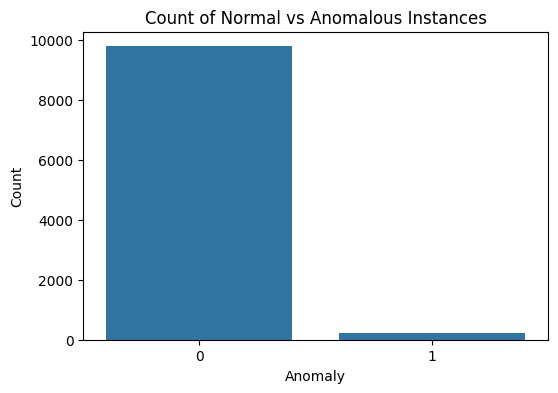

In [16]:
# Plot: Count of anomalies (0 = Normal, 1 = Anomaly)
plt.figure(figsize=(6, 4))
sns.countplot(x='Anomaly', data=data)
plt.title("Count of Normal vs Anomalous Instances")
plt.xlabel("Anomaly")
plt.ylabel("Count")
plt.show()

In [17]:
# Insight: The dataset is heavily imbalanced, with significantly more normal readings than anomalies.

In [18]:
# Count of anomalies and normal readings per sensor
sensor_anomaly_counts = data.groupby(['Location', 'Anomaly']).size().unstack(fill_value=0)
print("\nSensor Anomaly Counts:")
print(sensor_anomaly_counts)


Sensor Anomaly Counts:
Anomaly      0   1
Location          
SensorA   3254  73
SensorB   3298  79


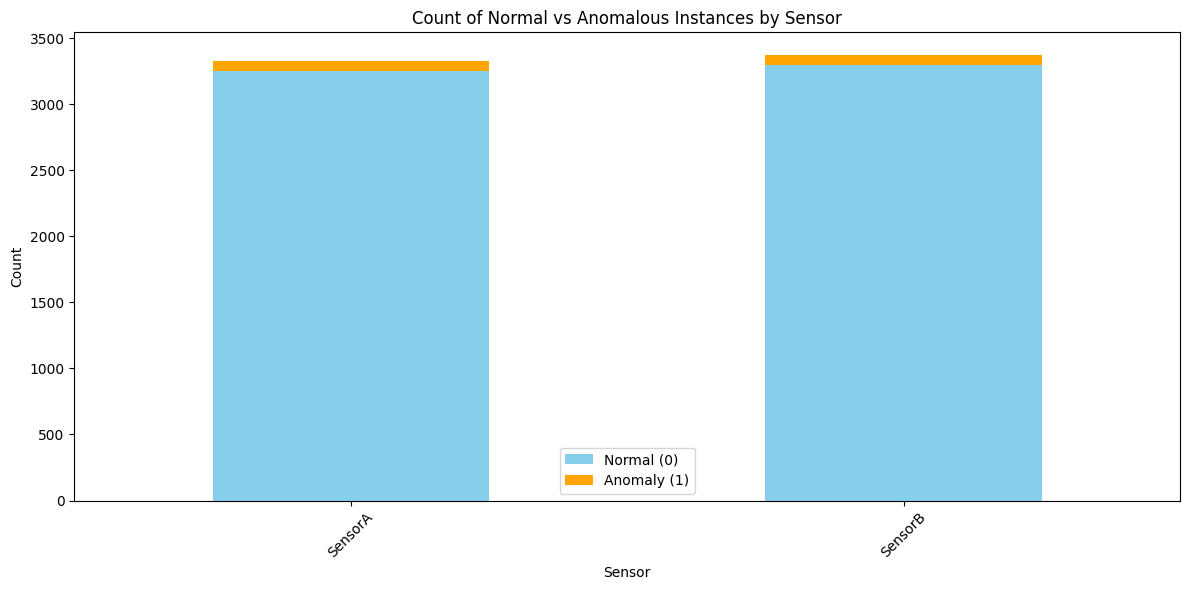

In [19]:
# Plot: Count of anomalies and normal readings by sensor
sensor_anomaly_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Count of Normal vs Anomalous Instances by Sensor")
plt.xlabel("Sensor")
plt.ylabel("Count")
plt.legend(["Normal (0)", "Anomaly (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

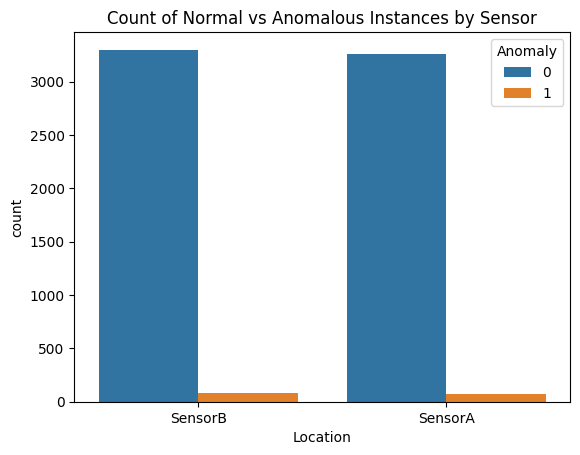

In [20]:
sns.countplot(x='Location', hue='Anomaly', data=data)
plt.title('Count of Normal vs Anomalous Instances by Sensor')
plt.show()

In [21]:
#Insight:'Location' did not show meaningful separation between anomalies and normal data.

In [22]:
data['Timestamp'].value_counts()

Timestamp
2024-06-01 19:50:29    9802
2024-06-01 19:50:28     198
Name: count, dtype: int64

In [23]:
data.tail()

,Timestamp,Temperature,Anomaly,Location
9995,2024-06-01 19:50:29,26.460733,0,SensorA
9996,2024-06-01 19:50:29,22.027875,0,NaN
9997,2024-06-01 19:50:29,17.917821,0,SensorA
9998,2024-06-01 19:50:29,23.730639,0,SensorB
9999,2024-06-01 19:50:29,25.680470,0,NaN


In [24]:
# Count of anomalies and normal readings per timestamp
timestamp_anomaly_counts = data.groupby(['Timestamp', 'Anomaly']).size().unstack(fill_value=0)
print("\ntimestamp Anomaly Counts:")
print(timestamp_anomaly_counts)


timestamp Anomaly Counts:
Anomaly                 0    1
Timestamp                     
2024-06-01 19:50:28   193    5
2024-06-01 19:50:29  9578  224


In [25]:
data.shape

(10000, 4)

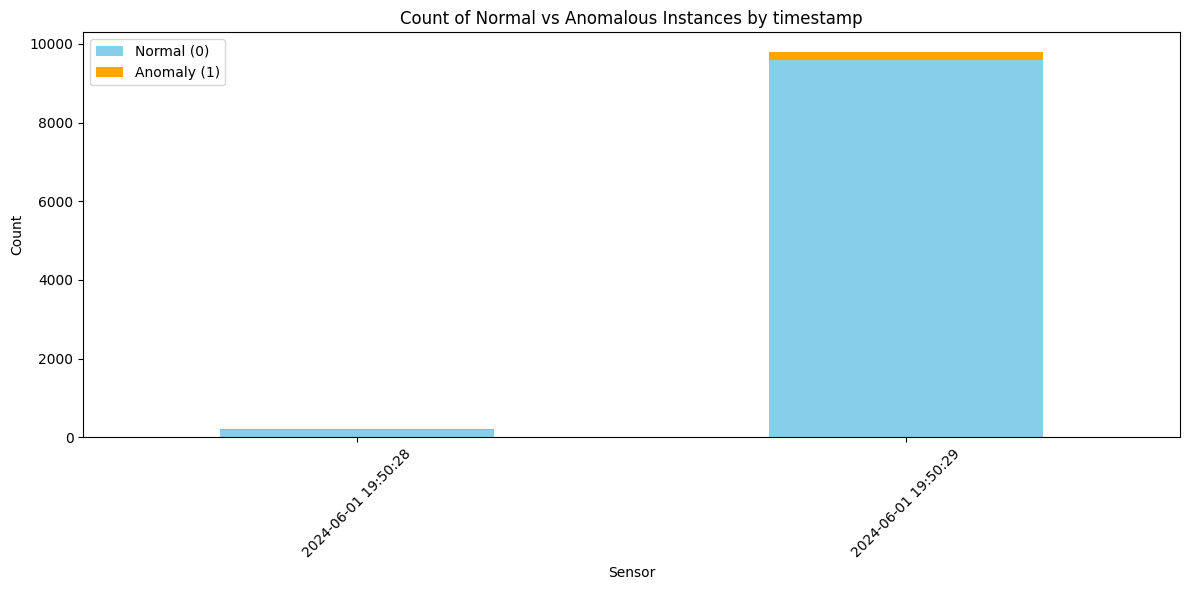

In [26]:
# Plot: Count of anomalies and normal readings by sensor
timestamp_anomaly_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Count of Normal vs Anomalous Instances by timestamp")
plt.xlabel("Sensor")
plt.ylabel("Count")
plt.legend(["Normal (0)", "Anomaly (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
data.columns

Index(['Timestamp', 'Temperature', 'Anomaly', 'Location'], dtype='object')

In [28]:
data1=data.drop(columns=['Timestamp','Location'])

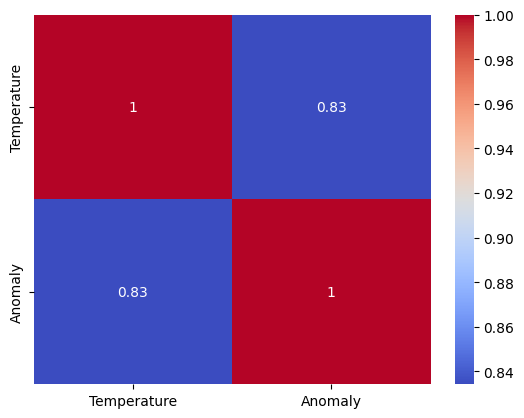

In [29]:
correlation = data1.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [30]:
#Insight:'Temperature' showed a strong coorelation with the 'Anomaly' target variable,
#          makingit the most critical feature for classification.